In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
training = pd.read_csv('kc_house_data_train.csv')

In [3]:
training.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
training.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 21 columns):
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.8+ MB


In [6]:
training['id'].value_counts()

1232000810    2
3558900590    2
3323059027    2
3935900232    2
3630120700    2
             ..
4312700200    1
7695370160    1
2473420070    1
9842300095    1
1777500160    1
Name: id, Length: 17176, dtype: int64

### This is where I would put the train-test split on the training data they gave us.  My questions for Josh - why are we doing feature selection and creation before the split?  Isn't this data leakage?  And why are they encouraging us to use multiple observations on the same house?  Violation of the independence assumption.

In [7]:
training.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Notes:
No missing values

## EDA of sale price

In [8]:
training['price'].describe()

count    1.729000e+04
mean     5.407395e+05
std      3.733190e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

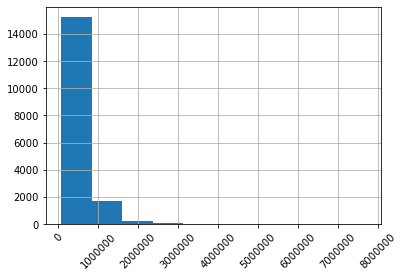

In [9]:
training['price'].hist(xrot=45)

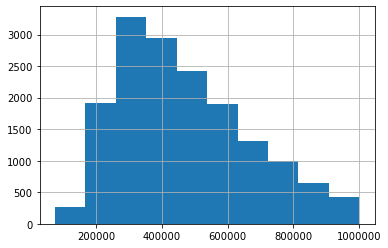

In [10]:
training.loc[training['price'] < 1000000, 'price'].hist()

## Notes:
1) Mean sale price is 540,739.50 (+- 373319), Median is 450,000
2) Heavy right skew

## EDA of categorical features and bivariable relationship with sale price.

In [11]:
categorical = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64
bedrooms
0     4.319667e+05
1     3.265255e+05
2     4.006608e+05
3     4.654743e+05
4     6.377381e+05
5     7.847411e+05
6     8.377285e+05
7     9.861672e+05
8     1.255600e+06
9     8.167998e+05
10    8.193333e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64
                   sum_sq       df           F  PR(>F)
C(bedrooms)  2.551850e+14     12.0  170.541333     0.0
Residual     2.154332e+15  17277.0         NaN     NaN


/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


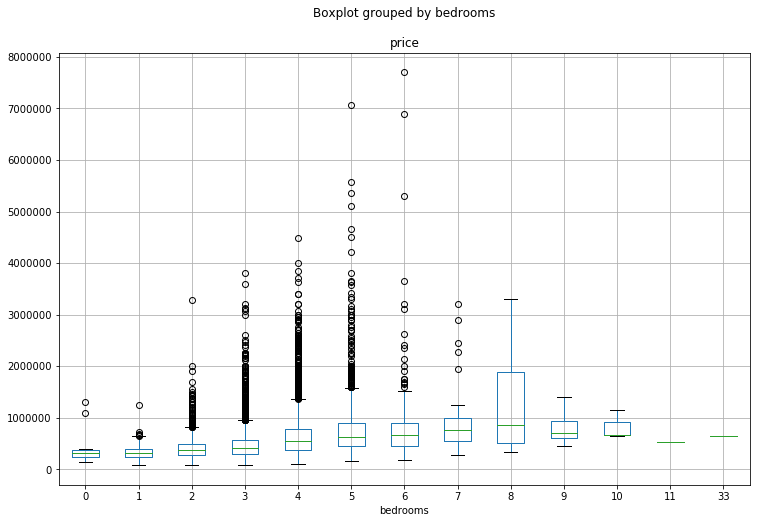

2.50    4322
1.00    3100
1.75    2431
2.25    1666
2.00    1549
1.50    1168
2.75     896
3.00     592
3.50     591
3.25     455
3.75     135
4.00     107
4.50      76
4.25      64
0.75      52
5.00      17
4.75      16
5.25      11
0.00       8
5.50       7
1.25       6
6.00       6
5.75       3
0.50       3
8.00       2
6.75       2
6.25       2
7.50       1
6.50       1
7.75       1
Name: bathrooms, dtype: int64
bathrooms
0.00    5.077062e+05
0.50    2.255000e+05
0.75    2.766520e+05
1.00    3.463276e+05
1.25    6.010000e+05
1.50    4.073672e+05
1.75    4.582803e+05
2.00    4.557473e+05
2.25    5.372734e+05
2.50    5.566379e+05
2.75    6.545027e+05
3.00    7.149029e+05
3.25    9.656770e+05
3.50    9.289996e+05
3.75    1.198263e+06
4.00    1.309828e+06
4.25    1.532047e+06
4.50    1.328587e+06
4.75    1.817828e+06
5.00    1.749518e+06
5.25    1.866118e+06
5.50    2.803286e+06
5.75    3.143333e+06
6.00    2.946833e+06
6.25    3.094000e+06
6.50    2.238890e+06
6.75    2.734000e+06
7.5

/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


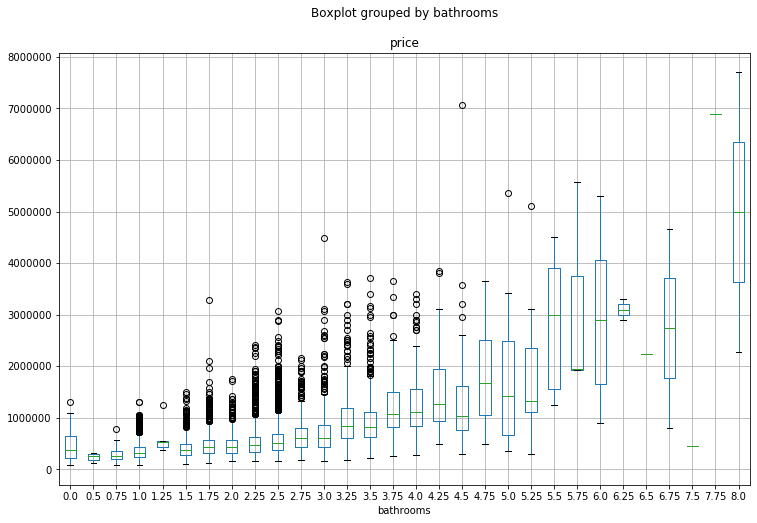

1.0    8606
2.0    6538
1.5    1524
3.0     475
2.5     140
3.5       7
Name: floors, dtype: int64
floors
1.0    4.434050e+05
1.5    5.525950e+05
2.0    6.504333e+05
2.5    1.094988e+06
3.0    5.861594e+05
3.5    1.004500e+06
Name: price, dtype: float64
                 sum_sq       df           F  PR(>F)
C(floors)  2.059096e+14      5.0  323.010561     0.0
Residual   2.203607e+15  17284.0         NaN     NaN


/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


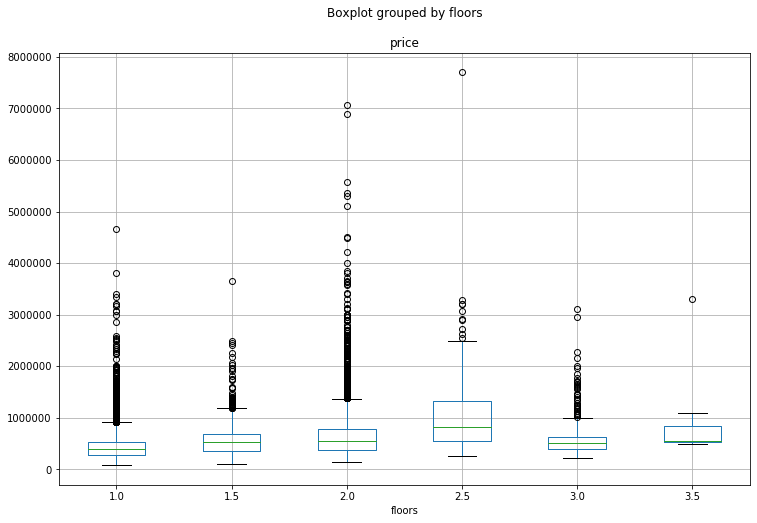

0    17152
1      138
Name: waterfront, dtype: int64
waterfront
0    5.315051e+05
1    1.688486e+06
Name: price, dtype: float64
                     sum_sq       df            F         PR(>F)
C(waterfront)  1.832531e+14      1.0  1423.047687  2.465038e-299
Residual       2.226264e+15  17288.0          NaN            NaN


/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


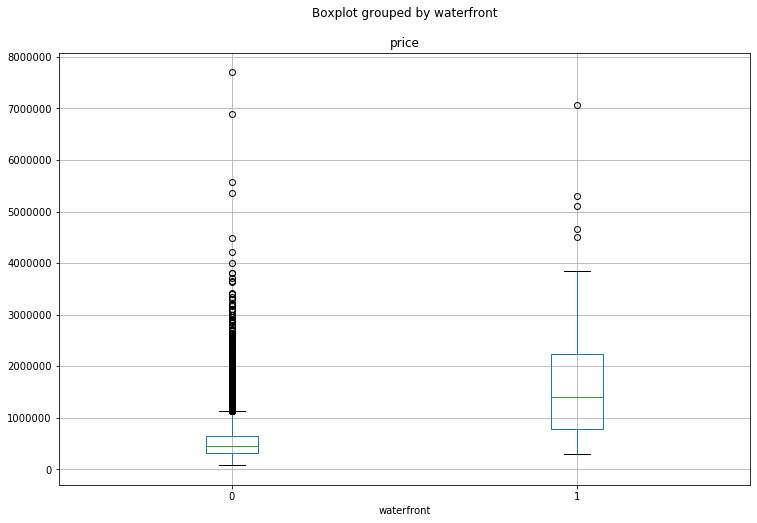

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64
view
0    4.967704e+05
1    8.137702e+05
2    7.794212e+05
3    9.640048e+05
4    1.481651e+06
Name: price, dtype: float64
                sum_sq       df           F  PR(>F)
C(view)   4.064221e+14      4.0  876.768936     0.0
Residual  2.003095e+15  17285.0         NaN     NaN


/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


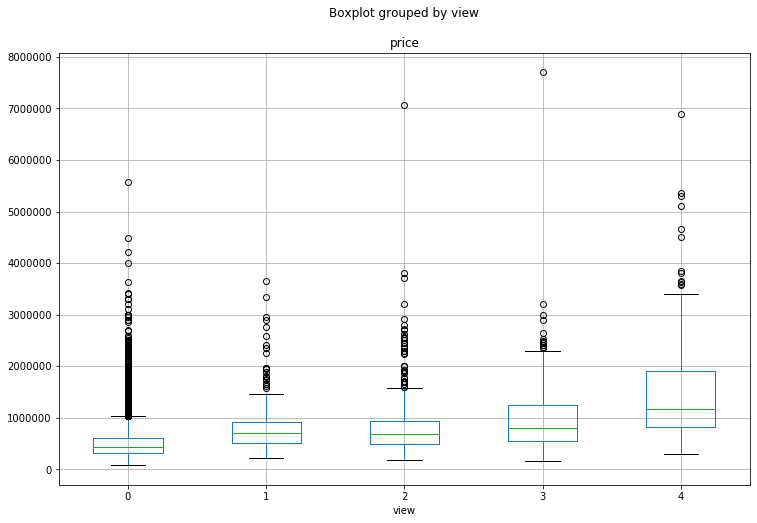

3    11244
4     4516
5     1367
2      139
1       24
Name: condition, dtype: int64
condition
1    346372.916667
2    339570.784173
3    542532.662665
4    520915.722321
5    615348.095099
Name: price, dtype: float64
                    sum_sq       df          F        PR(>F)
C(condition)  1.595204e+13      4.0  28.799197  6.813537e-24
Residual      2.393565e+15  17285.0        NaN           NaN


/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


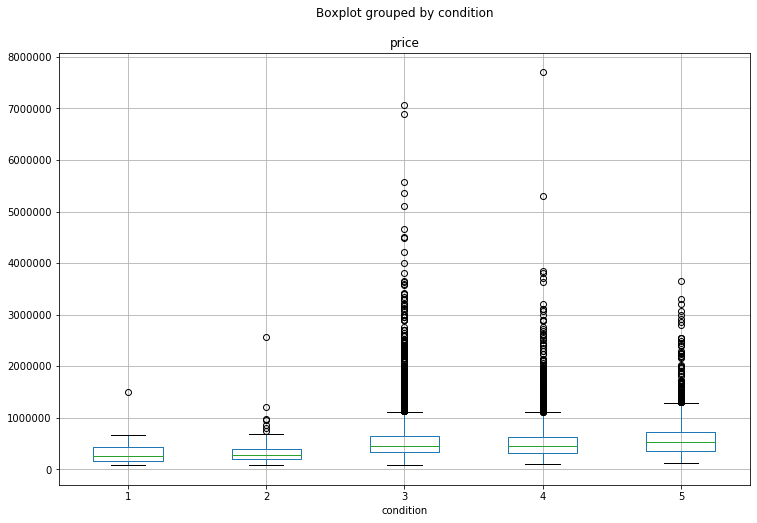

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64
grade
1     1.420000e+05
3     1.685000e+05
4     2.106386e+05
5     2.438372e+05
6     3.026820e+05
7     4.025267e+05
8     5.430105e+05
9     7.741618e+05
10    1.072903e+06
11    1.507967e+06
12    2.314347e+06
13    4.002727e+06
Name: price, dtype: float64
                sum_sq       df            F  PR(>F)
C(grade)  1.274417e+15     11.0  1763.511029     0.0
Residual  1.135100e+15  17278.0          NaN     NaN


/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


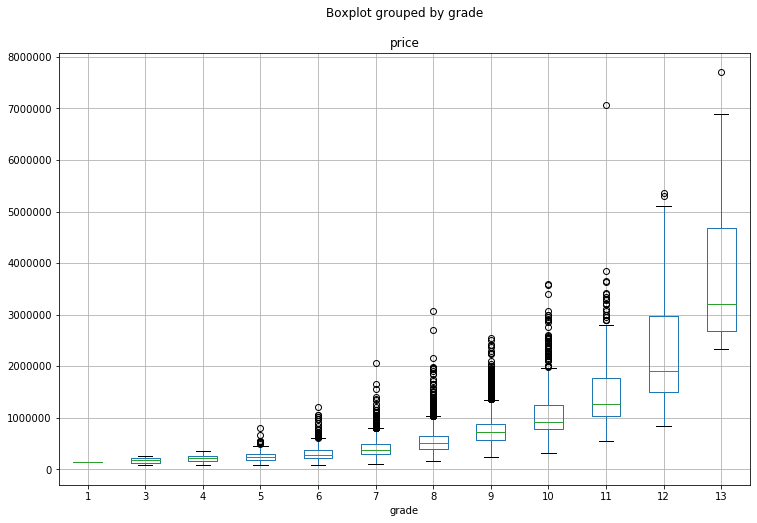

98052    474
98115    465
98103    461
98038    455
98117    437
        ... 
98102     80
98010     74
98024     65
98148     43
98039     42
Name: zipcode, Length: 70, dtype: int64
zipcode
98001    2.819988e+05
98002    2.322865e+05
98003    2.907627e+05
98004    1.396883e+06
98005    8.088476e+05
             ...     
98177    6.552490e+05
98178    3.126811e+05
98188    2.890318e+05
98198    3.051785e+05
98199    7.871469e+05
Name: price, Length: 70, dtype: float64
                  sum_sq       df           F  PR(>F)
C(zipcode)  9.673067e+14     69.0  167.386197     0.0
Residual    1.442210e+15  17220.0         NaN     NaN


/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


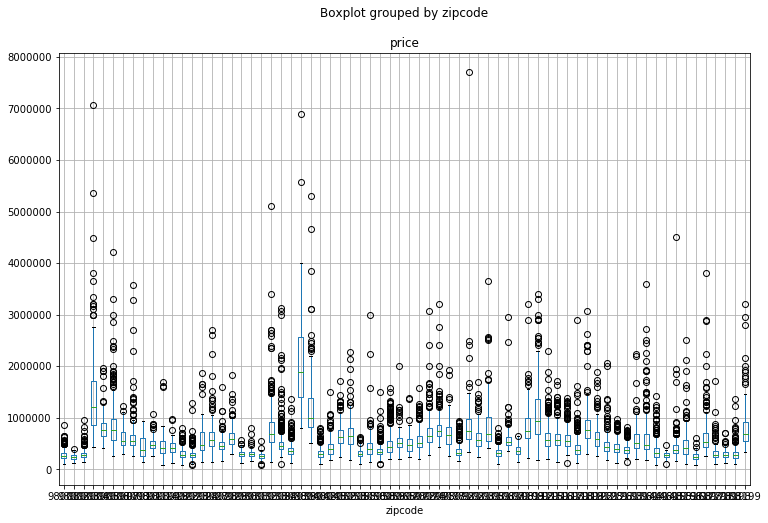

In [12]:
for var in categorical:
    print(training[var].value_counts())
    print(training.groupby([var])['price'].mean())
    mod = ols(f'price ~ C({var})', data=training).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)
    training.boxplot('price', by=var, figsize=(12, 8))
    plt.show()

## Notes:
#### 1) bedrooms:
1a) cell counts - not sure what would have zero bedrooms but 12 observations isn't stable enough - need to combine with 1 bdrm. Cell counts fall off at 6+.
1b) See an increase in sale price for 4+ bdrms compared to 0-3.  
1c) Given cell sizes probably want to top code at either 6+ or 7+
1d) Overall impression of shape - generally increasing, likely heteroscedastic residuals (maybe log transform) looking at tails of the box plots.  Relationship probably non-linear either root of bdrms or series of dummy vars.
First guess - [0,1],[2],[3],[4],[5],[6],[7+]
#### 2) Bathrooms:
2a) cell counts get sparse above 4 bath.  0 bth 8; 0.5 3; 0.75 52; 1.25 6 (but all other floats of 1 are frequently observed).
2b) cell counts are low but as expected not having a full bath = lower mean sell price (though 0 bth is surprisingly high).  1.25 really sticks out as too high - maybe a data entry error.
2c) Overall, the impression is very similar to bedrooms - generally increasing, likely non-linear, likely heterscedastic residuals if untransformed.
First guess - [<1],[1],[>1-2],[>2-3],[>3-4],[>4-5],[>5] But check both tails here - CI's likely enormous
#### 3) Floors
3a) Few categories, non-linear, generally increasing pattern
First guess - [1],[1.5],[2],[2.5],[3+]
#### 4) Waterfront
4a) As expected waterfront is significantly higher mean sale price.  Model as is.
#### 5) View:
5a) Hard to find information on this variable.  Poked around on kaggle - nothing.  Found this website: https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices
Stating, 'View An index from 0 to 4 of how good the view of the property was'
Assuming 0 means no view.  Increasing sale price as rating increases.  Relatively small cell sizes might have to combine 1,2 and 3,4. 
First guess - 0,1,2,3,4
#### 6) Condition:
Same website as above notes: An index from 1 to 5 on the condition of the apartment.
Generally increasing mean sale price.  Looking at means might be able to combine 1,2; 3,4; 5
#### 7) Grade
Same website as above: Grade An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11- 13 have a high quality level of construction and design
1,3,4 and 12,13 sparse cells.  Strong, seemingly exponential increase in sale price with increasing grade
First guess - [1-5],[6,7],[8,9],[10],[11-13]
#### 8) Zip code:
More zip codes than I anticipated.  Location is important but probably want finer level of detail than offered by zip code.  Would probably want to use the lat and long data along with census information to get median income for the neighborhood or school district.

## EDA of continuous features and bivariable relationship with sale price.

In [13]:
continuous = ['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']

count    17290.000000
mean      2081.464604
std        920.018539
min        290.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


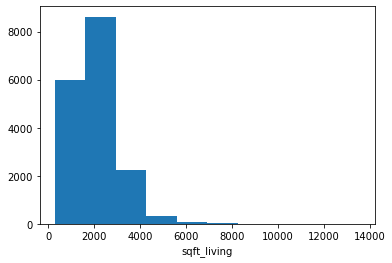

count    1.729000e+04
mean     1.524340e+04
std      4.230462e+04
min      5.720000e+02
25%      5.081250e+03
50%      7.642000e+03
75%      1.072575e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64


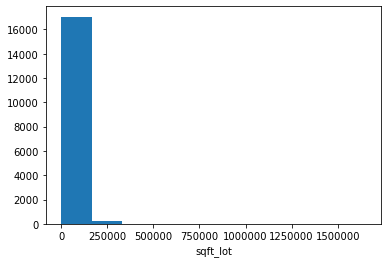

count    17290.000000
mean      1789.306015
std        829.265107
min        290.000000
25%       1200.000000
50%       1560.000000
75%       2214.500000
max       9410.000000
Name: sqft_above, dtype: float64


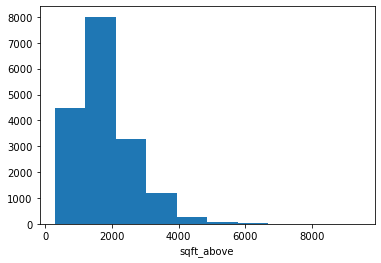

count    17290.000000
mean       292.158589
std        443.151874
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64


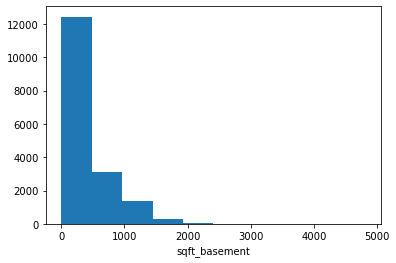

count    17290.000000
mean      1970.792019
std         29.343516
min       1900.000000
25%       1951.000000
50%       1974.000000
75%       1996.000000
max       2015.000000
Name: yr_built, dtype: float64


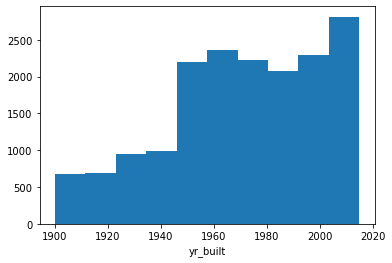

count    17290.000000
mean        83.806304
std        400.329376
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64


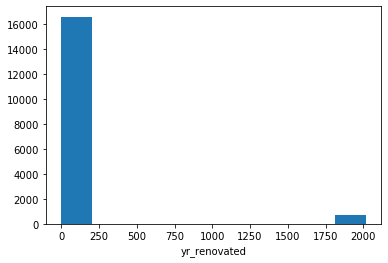

count    17290.000000
mean      1987.986698
std        684.802635
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64


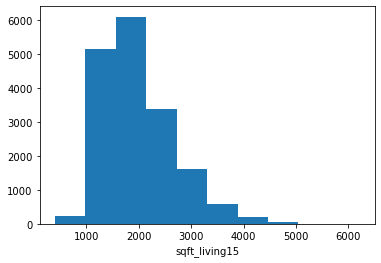

count     17290.000000
mean      12873.475824
std       27227.437583
min         659.000000
25%        5111.250000
50%        7622.500000
75%       10101.750000
max      858132.000000
Name: sqft_lot15, dtype: float64


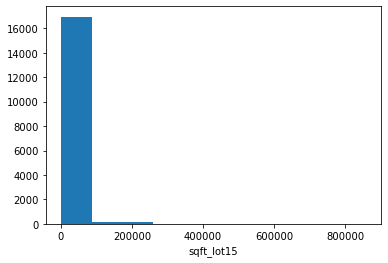

In [14]:
for var in continuous:
    print(training[var].describe())
    plt.hist(x=var, data=training)
    plt.xlabel(f'{var}')
    plt.show()

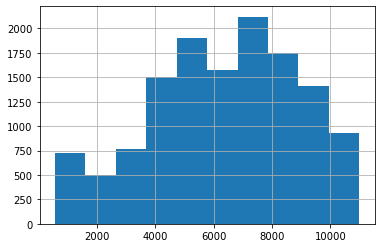

In [15]:
training.loc[training['sqft_lot'] < 11000, 'sqft_lot'].hist()

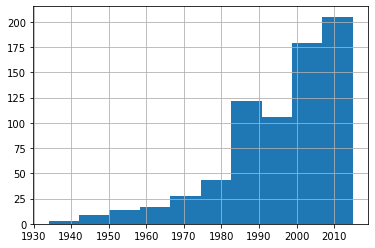

In [16]:
training.loc[training['yr_renovated'] > 0, 'yr_renovated'].hist()

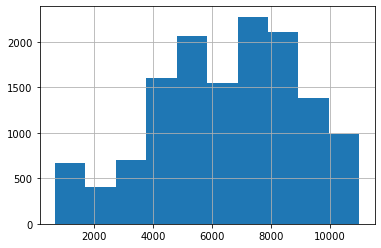

In [17]:
training.loc[training['sqft_lot15'] < 11000, 'sqft_lot15'].hist()

## Notes:
Looking purely at the univariable histograms, as expected, all the square footage variables are right skewed.  I expect colinearity between many of these measures.  

count    17290.000000
mean      2081.464604
std        920.018539
min        290.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64
Pearsons correlation: (0.7035403039789669, 0.0)
KendalltauResult(correlation=0.4645631956349163, pvalue=0.0)


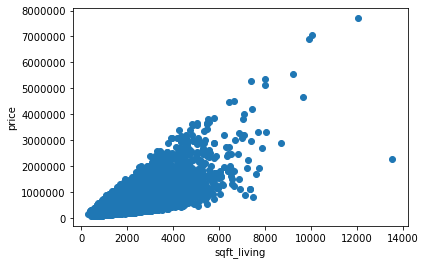

count    1.729000e+04
mean     1.524340e+04
std      4.230462e+04
min      5.720000e+02
25%      5.081250e+03
50%      7.642000e+03
75%      1.072575e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64
Pearsons correlation: (0.0868031093524548, 2.8073725559685796e-30)
KendalltauResult(correlation=0.04949921895555078, pvalue=1.9185823605576887e-22)


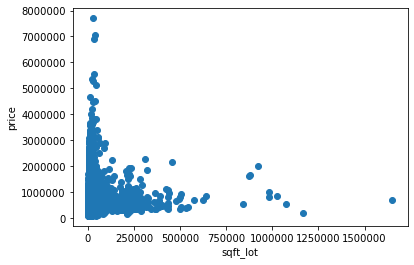

count    17290.000000
mean      1789.306015
std        829.265107
min        290.000000
25%       1200.000000
50%       1560.000000
75%       2214.500000
max       9410.000000
Name: sqft_above, dtype: float64
Pearsons correlation: (0.6077596929372431, 0.0)
KendalltauResult(correlation=0.3802832240455216, pvalue=0.0)


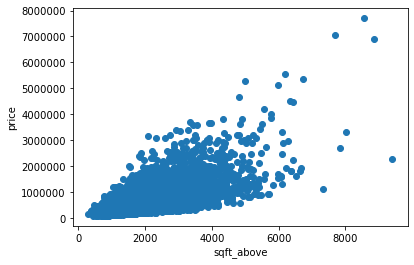

count    17290.000000
mean       292.158589
std        443.151874
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64
Pearsons correlation: (0.3233117680868857, 0.0)
KendalltauResult(correlation=0.18664975382405202, pvalue=9.419358239358509e-241)


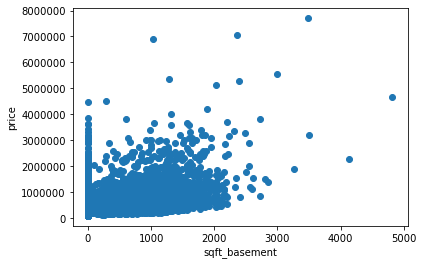

count    17290.000000
mean      1970.792019
std         29.343516
min       1900.000000
25%       1951.000000
50%       1974.000000
75%       1996.000000
max       2015.000000
Name: yr_built, dtype: float64
Pearsons correlation: (0.05645007489461683, 1.1017832792233933e-13)
KendalltauResult(correlation=0.0731561211389678, pvalue=1.4235040130342515e-46)


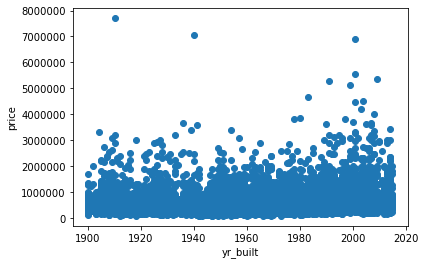

count    17290.000000
mean        83.806304
std        400.329376
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64
Pearsons correlation: (0.11776994288661466, 1.8973597280705488e-54)
KendalltauResult(correlation=0.07768916927403018, pvalue=1.519447498252574e-36)


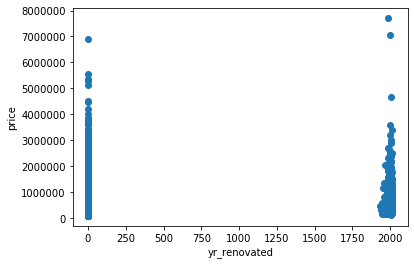

count    17290.000000
mean      1987.986698
std        684.802635
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64
Pearsons correlation: (0.5855670702254931, 0.0)
KendalltauResult(correlation=0.4068871077634293, pvalue=0.0)


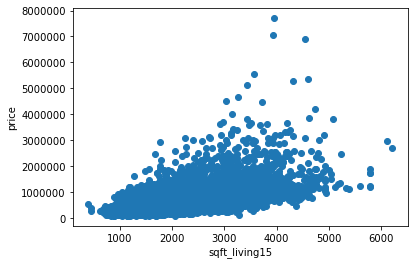

count     17290.000000
mean      12873.475824
std       27227.437583
min         659.000000
25%        5111.250000
50%        7622.500000
75%       10101.750000
max      858132.000000
Name: sqft_lot15, dtype: float64
Pearsons correlation: (0.08142253547125156, 7.904286247919057e-27)
KendalltauResult(correlation=0.041237352657738334, pvalue=4.74177450960884e-16)


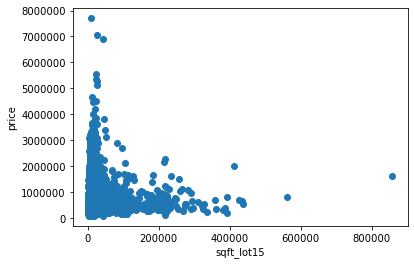

In [18]:
for var in continuous:
    print(training[var].describe())
    a = scipy.stats.pearsonr(training[var], training['price'])
    print(f'Pearsons correlation: {a}')
    print(scipy.stats.kendalltau(training[var], training['price']))
    plt.scatter(x=var, y='price', data=training)
    plt.xlabel(f'{var}')
    plt.ylabel('price')
    plt.show()

count     726.000000
mean     1995.882920
std        15.646837
min      1934.000000
25%      1987.250000
50%      2000.000000
75%      2007.000000
max      2015.000000
Name: yr_renovated, dtype: float64
Pearsons correlation: (0.13369367590312548, 0.0003034751198319877)
KendalltauResult(correlation=0.11157228522186534, pvalue=9.343381371091062e-06)


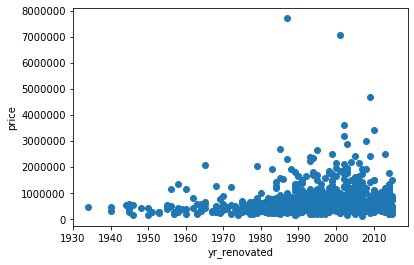

In [19]:
renovated = training.loc[training['yr_renovated'] > 0]
print(renovated['yr_renovated'].describe())
a = scipy.stats.pearsonr(renovated['yr_renovated'], renovated['price'])
print(f'Pearsons correlation: {a}')
print(scipy.stats.kendalltau(renovated['yr_renovated'], renovated['price']))
plt.scatter(x='yr_renovated', y='price', data=renovated)
plt.xlabel('yr_renovated')    
plt.ylabel('price')
plt.show()

## Notes:
#### 1) sqft_living:
Strong, positive, linear relationship with sale price - though kendall's tau suggests a more modest relationship.  likely heteroscedastic.  One observation likely highly influential (14,000 sqft sold for 2ish million). We didn't talk about leverage/influence so not sure how they want us to handle these observations.  Leaving it in is going to lower the parameter estimate for sqft_living 
#### 2) sqft_lot:
Violates normality and linearity.  The vertical line at low lot size isn't surprising but thought it would be generally increasing after that.  Log transform both and re-evaluate.
#### 3) sqft_above:
Generally linear, positive, modest association.  Some outliers - would guess pulling in both directions and overall influence balanced.  
#### 4) sqft_basement:
Zero inflated. Many more outliers.  Not a neat linear pattern.  Low priority variable as is.  Maybe more valuable as a dummy (basement yes/no).
#### 5) yr_built:
Significant correlation but not a big effect size.  Not terribly surprising - cheap and expensive houses are built every year.
#### 6) yr_renovated:
Looking at scatterplot of full data - the 0 column shows a large variance.  Looking at scatter of those that have been renovated - modest correlation.  Really just shows that houses last renovated in 1980 or earlier are slightly cheaper.  Could do three level dummy (not renovated, 1980 or earlier, and 1981 or later)
#### 7) sqft_living15 and sqft_lot15:
These are the same shape as for the observed house.  These measures are taping into how the neighborhood affects sale price.  There are likely better ways to model that (school district, median household income at the census block level)

## Log transforming price, sqft_living, sqft_lot

In [20]:
training['log_price'] = np.log(training['price'])
training['log_sqft_living'] = np.log(training['sqft_living'])
training['log_sqft_lot'] = np.log(training['sqft_lot'])
training.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_sqft_living,log_sqft_lot
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,7.635304,9.093020
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,7.972466,8.814330
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,8.234830,9.295876
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,8.425078,9.589325
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,7.843849,8.589700


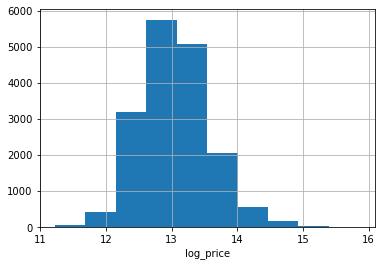

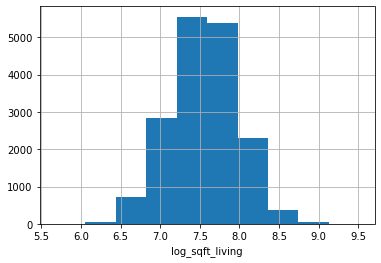

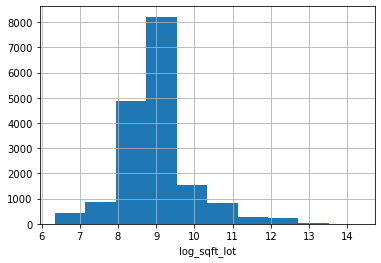

In [67]:
training['log_price'].hist()
plt.xlabel('log_price')
plt.show()
training['log_sqft_living'].hist()
plt.xlabel('log_sqft_living')
plt.show()
training['log_sqft_lot'].hist()
plt.xlabel('log_sqft_lot')
plt.show()

## Notes:
log transforming the variables has made them more normally distributed.  Though sqft_lot may fail the kurtosis test.

Pearsons correlation: (0.6089656793039343, 0.0)
KendalltauResult(correlation=0.4645631956349163, pvalue=0.0)


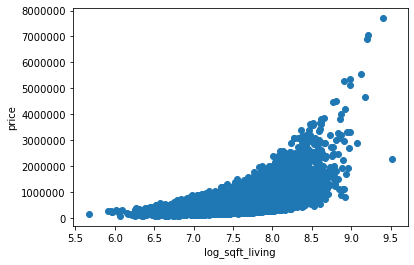

In [63]:
a = scipy.stats.pearsonr(training['log_sqft_living'], training['price'])
print(f'Pearsons correlation: {a}')
print(scipy.stats.kendalltau(training['log_sqft_living'], training['price']))
plt.scatter(x='log_sqft_living', y='price', data=training)
plt.xlabel('log_sqft_living')
plt.ylabel('price')
plt.show()

Pearsons correlation: (0.696894722072588, 0.0)
KendalltauResult(correlation=0.4645631956349163, pvalue=0.0)


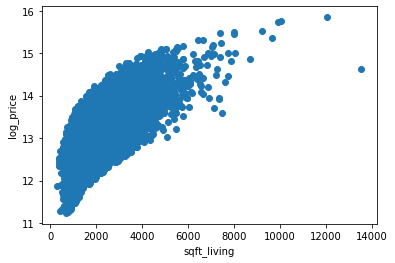

In [64]:
a = scipy.stats.pearsonr(training['sqft_living'], training['log_price'])
print(f'Pearsons correlation: {a}')
print(scipy.stats.kendalltau(training['sqft_living'], training['log_price']))
plt.scatter(x='sqft_living', y='log_price', data=training)
plt.xlabel('sqft_living')
plt.ylabel('log_price')
plt.show()

Pearsons correlation: (0.16170311699225676, 1.2792520602079933e-101)
KendalltauResult(correlation=0.04949921895555078, pvalue=1.9185823605576887e-22)


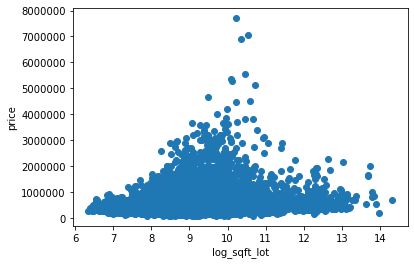

In [62]:
a = scipy.stats.pearsonr(training['log_sqft_lot'], training['price'])
print(f'Pearsons correlation: {a}')
print(scipy.stats.kendalltau(training['log_sqft_lot'], training['price']))
plt.scatter(x='log_sqft_lot', y='price', data=training)
plt.xlabel('log_sqft_lot')
plt.ylabel('price')
plt.show()

Pearsons correlation: (0.09765134787970943, 6.626804852428249e-38)
KendalltauResult(correlation=0.04949921895555078, pvalue=1.9185823605576887e-22)


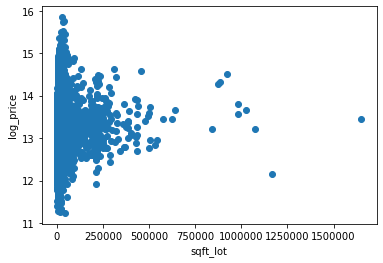

In [65]:
a = scipy.stats.pearsonr(training['sqft_lot'], training['log_price'])
print(f'Pearsons correlation: {a}')
print(scipy.stats.kendalltau(training['sqft_lot'], training['log_price']))
plt.scatter(x='sqft_lot', y='log_price', data=training)
plt.xlabel('sqft_lot')
plt.ylabel('log_price')
plt.show()

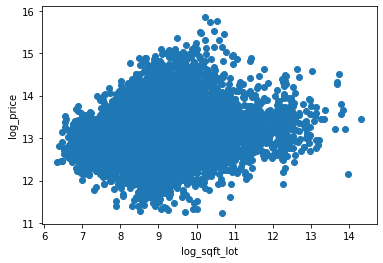

In [66]:
plt.scatter(x='log_sqft_lot', y='log_price', data=training)
plt.xlabel('log_sqft_lot')
plt.ylabel('log_price')
plt.show()

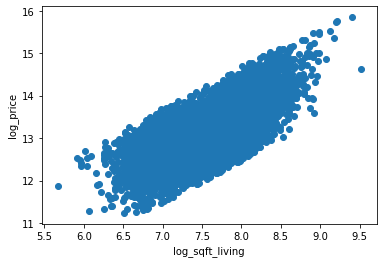

In [68]:
plt.scatter(x='log_sqft_living', y='log_price', data=training)
plt.xlabel('log_sqft_living')
plt.ylabel('log_price')
plt.show()

In [24]:
training['sqft_lot'].value_counts()

5000     289
6000     241
4000     203
7200     181
7500      99
        ... 
4543       1
5621       1
3574       1
19966      1
36862      1
Name: sqft_lot, Length: 8428, dtype: int64

In [25]:
(training['sqft_lot']==training['sqft_living']).value_counts()

False    17290
dtype: int64

## Notes:
#### log_sqft_living 
The relationship between log_sqft_living and price appears non-linear.  Would try including a quadratic term
#### log_sqft_lot
Clearly non-linear.  This is again likely all the high priced apartments.  But 0 sqft isn't the modal sqft value and none of the lot sizes are equal to the living sqft so I'm not entirely sure how this variable is working for apts.  Transformed and untransformed scatterplots don't show a strongly linear relationship.  Let's try an interaction with either bedrooms or sqft_living - the relationship between lot size and price depends on there being a lot which we may be able to tap into with bedrooms/total square footage.
#### Using the log transformation of both:
Makes the relationship between sqft_living and price very linear.  Shows there isn't really a relationship between sqft_lot and price.  In terms of interpretability going to do a first round of modeling with untransformed price and compare to the log transformed.

## Correlation matrix to assess colinearity

In [26]:
training[['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']].corr()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
sqft_living,1.000000,0.166810,0.876696,0.435529,0.319397,0.051448,0.755066,0.179570
sqft_lot,0.166810,1.000000,0.180755,0.008065,0.054228,0.004520,0.136959,0.701875
sqft_above,0.876696,0.180755,1.000000,-0.051199,0.424328,0.020413,0.731077,0.193874
sqft_basement,0.435529,0.008065,-0.051199,1.000000,-0.130948,0.068611,0.199521,0.010007
yr_built,0.319397,0.054228,0.424328,-0.130948,1.000000,-0.222668,0.332340,0.076624
yr_renovated,0.051448,0.004520,0.020413,0.068611,-0.222668,1.000000,-0.010221,0.004489
sqft_living15,0.755066,0.136959,0.731077,0.199521,0.332340,-0.010221,1.000000,0.178533
sqft_lot15,0.179570,0.701875,0.193874,0.010007,0.076624,0.004489,0.178533,1.000000


## Notes:
#### Unsurprisingly, the following variables are colinear:
#### sqft_living; sqft_above; sqft_living15
#### sqft_lot, sqft_lot15 (though technically less than 0.75)

## Variable creation

In [27]:
categorical = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']

In [43]:
#Creating categories as determined by EDA
training['bedrooms_cat'] = training['bedrooms'].map(lambda x: 1 if (x == 0) | (x ==1) else\
                                                    2 if x ==2 else\
                                                    3 if x==3 else\
                                                    4 if x==4 else\
                                                    5 if x==5 else\
                                                    6 if x==6 else 7)
# Checking to make sure recoded as expected
# pd.crosstab(training['bedrooms'], training['bedrooms_cat'])
bdrm_dummies = pd.get_dummies(training['bedrooms_cat'], prefix='bdrm')

In [46]:
training['bathrooms_cat'] = training['bathrooms'].map(lambda x: 1 if (x < 1) else\
                                                      2 if x ==1 else\
                                                      3 if (x > 1)&(x<=2) else\
                                                      4 if (x > 2)&(x<=3) else\
                                                      5 if (x > 3)&(x<=4) else\
                                                      6 if (x > 4)&(x<=5) else 7)
# Checking to make sure recoded as expected
# pd.crosstab(training['bathrooms'], training['bathrooms_cat'])
bthrm_dummies = pd.get_dummies(training['bathrooms_cat'], prefix='bthrm')

In [48]:
training['floors_cat'] = training['floors'].map(lambda x: 1 if (x == 1) else\
                                                      2 if x ==1.5 else\
                                                      3 if x ==2 else\
                                                      4 if x ==2.5 else 5)
# Checking to make sure recoded as expected
# pd.crosstab(training['floors'], training['floors_cat'])
flrs_dummies = pd.get_dummies(training['floors_cat'], prefix='flr')

In [54]:
training['view_cat'] = training['view'].map(lambda x: 1 if (x == 0) else\
                                                      2 if (x ==1)|(x==2) else 3)
# Checking to make sure recoded as expected
# pd.crosstab(training['view'], training['view_cat'])
view_collapsed_dummies = pd.get_dummies(training['view_cat'], prefix='view_collapsed')

In [50]:
view_dummies = pd.get_dummies(training['view'], prefix='view')

In [55]:
training['condition_cat'] = training['condition'].map(lambda x: 1 if (x == 1)|(x==2) else\
                                                      2 if (x ==3)|(x==4) else 3)
# Checking to make sure recoded as expected
# pd.crosstab(training['view'], training['view_cat'])
condition_collapsed_dummies = pd.get_dummies(training['condition_cat'], prefix='condition_collapsed')

condition_dummies = pd.get_dummies(training['condition'], prefix='condition')

In [57]:
training['grade_cat'] = training['grade'].map(lambda x: 1 if (x >= 1)&(x<=5) else\
                                                      2 if (x >= 6)&(x<=7) else\
                                                      3 if (x >= 8)&(x<=9) else\
                                                      4 if (x == 10) else 5) 
# Checking to make sure recoded as expected
# pd.crosstab(training['grade'], training['grade_cat'])
grade_dummies = pd.get_dummies(training['grade_cat'], prefix='grade')

In [61]:
#The squarefootage variables are highly correlated.  Here creating a dummy for whether or not
#the house has a basement as it might be a feature to change the sale price for a house of a
#give squarefootage

training['basement_dummy'] = training['sqft_basement'].map(lambda x: 0 if (x == 0) else 1)
training['basement_dummy'].value_counts()

0    10484
1     6806
Name: basement_dummy, dtype: int64

In [71]:
training['renovated_cat'] = training['yr_renovated'].map(lambda x: 1 if (x == 0) else\
                                                      2 if (x > 0)&(x<=1980) else 3) 
# Checking to make sure recoded as expected
# pd.crosstab(training['yr_renovated'], training['renovated_cat'])
renovated_dummies = pd.get_dummies(training['renovated_cat'], prefix='renovated')

In [72]:
training['log_price'] = np.log(training['price'])
training['log_sqft_living'] = np.log(training['sqft_living'])
training['log_sqft_lot'] = np.log(training['sqft_lot'])

#quadratic term for log_sqft_living
training['squared_log_sqft_living'] = training['log_sqft_living']**2